In [ ]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.express as px
import colorcet as cc
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/HRDataset_v14.csv')
df.shape

(311, 36)

In [4]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
print("Duplicates:", df.duplicated().sum())
print("Missing values:", df.isnull().sum().sum())
print("Single valued columns:", df.columns[df.nunique()==1])

Duplicates: 0
Missing values: 215
Single valued columns: Index([], dtype='object')


In [6]:
df.EmploymentStatus.value_counts()

Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64

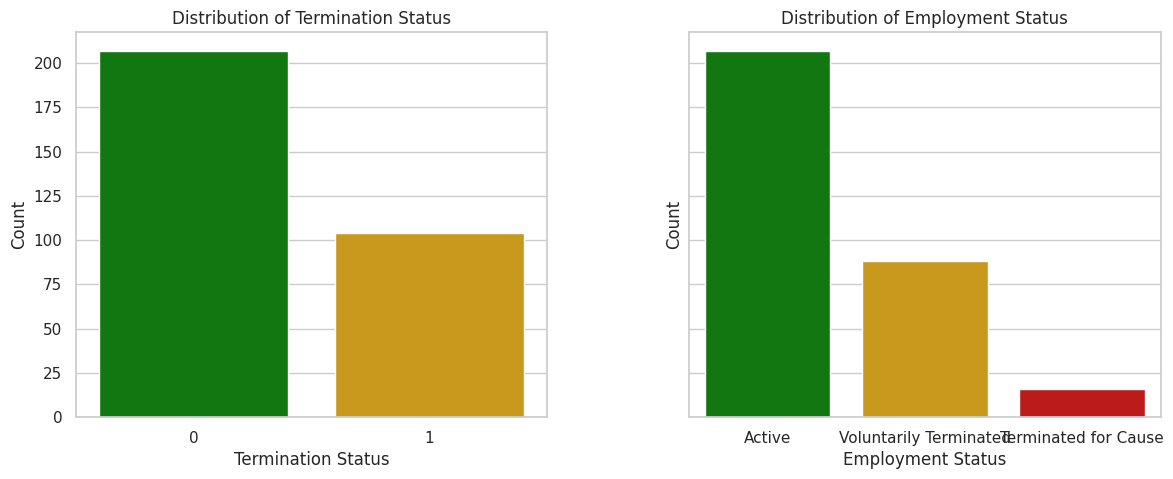

In [32]:
cmap = cc.glasbey_dark

colors = [cmap[i] for i in [2, 4,0]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

termd_counts = df['Termd'].value_counts()
sns.barplot(x=termd_counts.index, y=termd_counts.values, ax=ax1, palette=colors)

ax1.set_title('Distribution of Termination Status')
ax1.set_xlabel('Termination Status')
ax1.set_ylabel('Count')

emp_counts = df['EmploymentStatus'].value_counts()
sns.barplot(x=emp_counts.index, y=emp_counts.values, ax=ax2, palette=colors)

ax2.set_title('Distribution of Employment Status')
ax2.set_ylabel('Count')
ax2.set_xlabel('Employment Status')

plt.subplots_adjust(wspace=0.3)

plt.show()

In [ ]:
df.drop(['DateofTermination'], axis=1, inplace=True)

<Axes: >

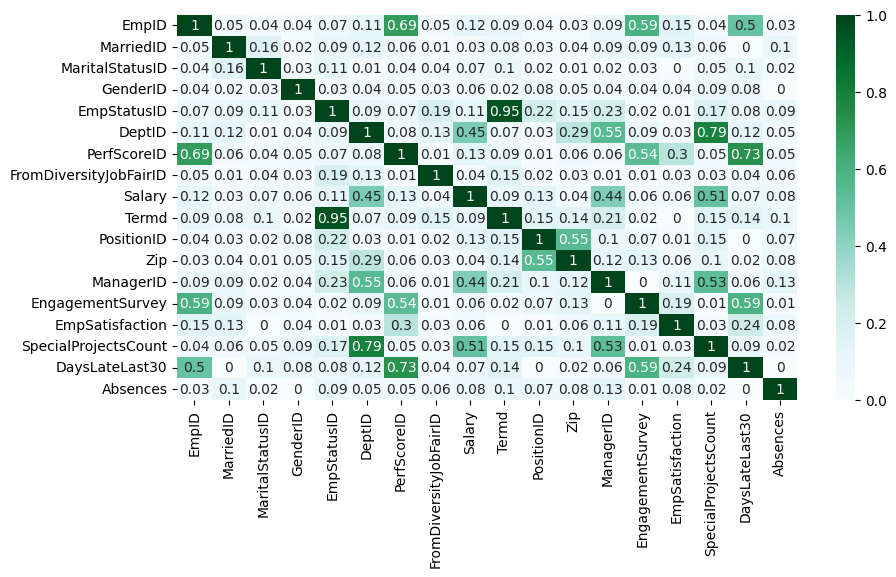

In [ ]:
#Let's use heatmap to explore the correlations between features in our employee turnover dataset.
plt.figure(figsize=(10,5))
sns.heatmap(df.corr().abs().round(2),annot=True, cmap = "BuGn")

In [13]:
cmap = cc.glasbey_dark

fig = px.scatter(df, x='ManagerID', y='Salary', color='SpecialProjectsCount',
                 color_continuous_scale=cmap)
fig.update_layout(
    title='Relationship between ManagerID, Salary, and Special Projects Count',
    xaxis_title='Manager ID',
    yaxis_title='Salary',
    legend_title='Special Projects Count'
)
fig.show()

Based on the heatmap analysis, we can observe a connection between the variables 'ManagerID', 'Salary', and 'SpecialProjectsCount'. The scatter plot further reveals that the number of special projects undertaken by an employee is zero for many managers and high for others. This could indicate that some departments may not require special projects and salaries for those departments are low.

**glasbey_dark ** palette from the colorcet package, has been designed to be distinguishable for people with color vision deficiencies.

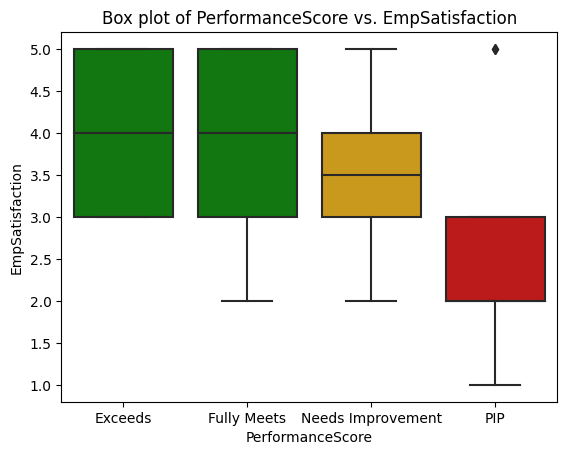

In [21]:
cmap = cc.glasbey_dark

colors = [cmap[i] for i in [2, 2, 4,0]]

sns.boxplot(x='PerformanceScore', y='EmpSatisfaction', data=df, palette=colors)
plt.title('Box plot of PerformanceScore vs. EmpSatisfaction')
plt.xlabel('PerformanceScore')
plt.ylabel('EmpSatisfaction')
plt.show()

The median EmpSatisfaction for employees who received a score of Exceeds Expectations or Fully Meets Expectations is slightly higher than the median EmpSatisfaction for those who received a score of Needs Improvement or PIP. Additionally, the interquartile range (IQR) for employees who received a score of Exceeds Expectations or Fully Meets Expectations is also higher than the IQR for those who received a score of Needs Improvement or PIP.

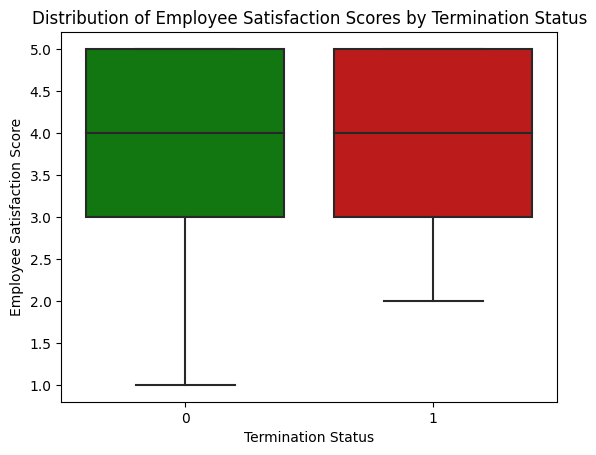

In [24]:
colors = [cmap[i] for i in [2,0]]

sns.boxplot(x='Termd', y='EmpSatisfaction', data=df, palette=colors)
plt.title('Distribution of Employee Satisfaction Scores by Termination Status')
plt.xlabel('Termination Status')
plt.ylabel('Employee Satisfaction Score')
plt.show()

The boxplot shows that the median employee satisfaction score is similar for both termination status classes. However, the interquartile range (IQR) for employees who are not terminated (Termd=0) starts at a lower satisfaction score (1), while the IQR for terminated employees (Termd=1) starts higher (2). The upper limits of both IQRs are similar.
This suggests that employees who are terminated may have, on average, higher levels of satisfaction than those who are not terminated, but there may be more variability in the satisfaction scores of terminated employees. These findings could potentially inform employee retention and satisfaction strategies for the business.








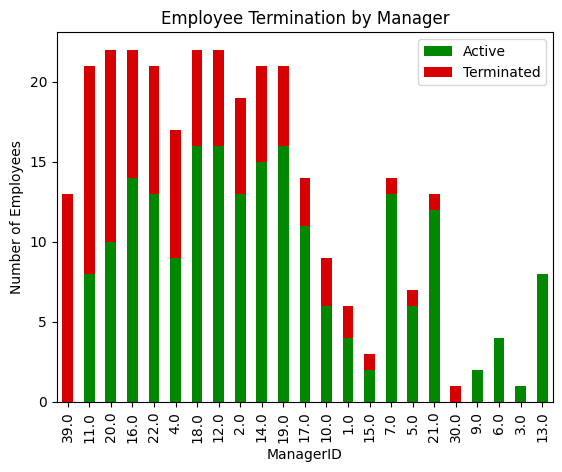

In [25]:
manager_termination_counts = df.groupby(['ManagerID', 'Termd'])['EmpID'].count().reset_index()
manager_termination_counts = manager_termination_counts.pivot(index='ManagerID', columns='Termd', values='EmpID')
manager_termination_counts.columns = ['Active', 'Terminated']
manager_termination_counts = manager_termination_counts.fillna(0)
colors = [cmap[i] for i in [2,0]]

manager_termination_counts = manager_termination_counts.sort_values(by='Terminated', ascending=False)
manager_termination_counts.plot(kind='bar', stacked=True, color=colors)

plt.title('Employee Termination by Manager')
plt.xlabel('ManagerID')
plt.ylabel('Number of Employees')

plt.legend(loc='upper right')
plt.show()

The plot shows the number of active and terminated employees per manager. The managers are sorted in descending order based on the number of terminated employees. We can see that there is a significant difference in the number of terminated employees among managers, with some having much higher termination rates than others.

It is important for the company to investigate the reasons behind these differences and take appropriate actions to ensure fair and consistent treatment of all employees across different managers. This may involve providing additional training for managers with higher termination rates, as well as implementing policies and procedures to ensure consistent and fair treatment of employees.

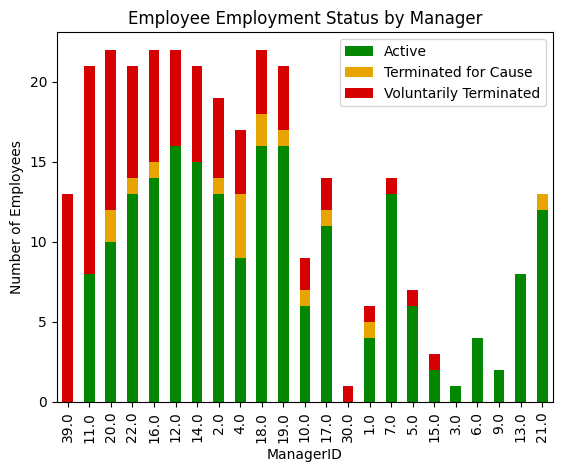

In [26]:
manager_employment_counts = df.groupby(['ManagerID', 'EmploymentStatus'])['EmpID'].count().reset_index()
manager_employment_counts = manager_employment_counts.pivot(index='ManagerID', columns='EmploymentStatus', values='EmpID')
manager_employment_counts = manager_employment_counts.sort_values(by='Voluntarily Terminated', ascending=False)
colors = [cmap[i] for i in [2,4,0]]
manager_employment_counts.plot(kind='bar', stacked=True, color=colors)

plt.title('Employee Employment Status by Manager')
plt.xlabel('ManagerID')
plt.ylabel('Number of Employees')

plt.legend(loc='upper right')
plt.show()

It appears that there is a significant difference in the number of employees who voluntarily terminated their employment based on their manager. In case of manager 4.0, considerably high proportion of people terminated for a cause. 
It is worth noting that the plot only shows the number of voluntary terminations and does not take into account factors such as employee satisfaction, job performance, or other variables that could affect an employee's decision to leave their job voluntarily. However, it does suggest that there may be some managerial practices or factors that influence employees' decisions to leave their jobs.

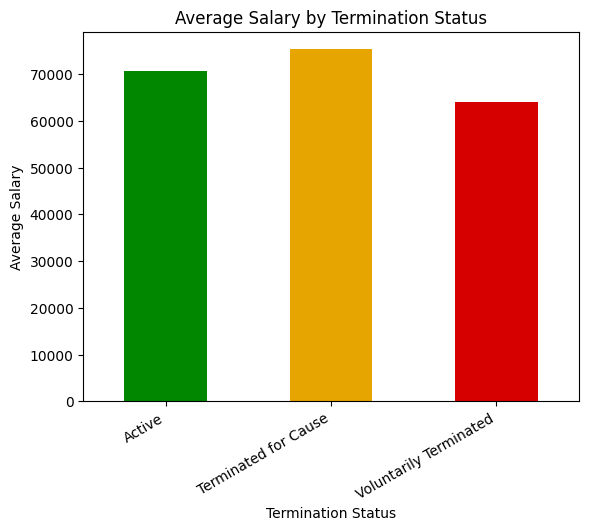

In [28]:
salary_data = df.groupby('EmploymentStatus')['Salary'].mean()

fig, ax = plt.subplots()
colors = [cmap[i] for i in [2,4,0]]

salary_data.plot(kind='bar', color=colors, ax=ax)
ax.set_xticklabels(salary_data.index, rotation=30, ha='right')

plt.title('Average Salary by Termination Status')
plt.xlabel('Termination Status')
plt.ylabel('Average Salary')

# show the plot
plt.show()

Based on the plot of employment status and salary, it appears that employees who were voluntarily terminated had a lower salary on average compared to employees who were terminated for cause.

In [37]:
num_cols = df.select_dtypes(exclude=['object'])


<ipython-input-30-bc80eaa7f24a>:8: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



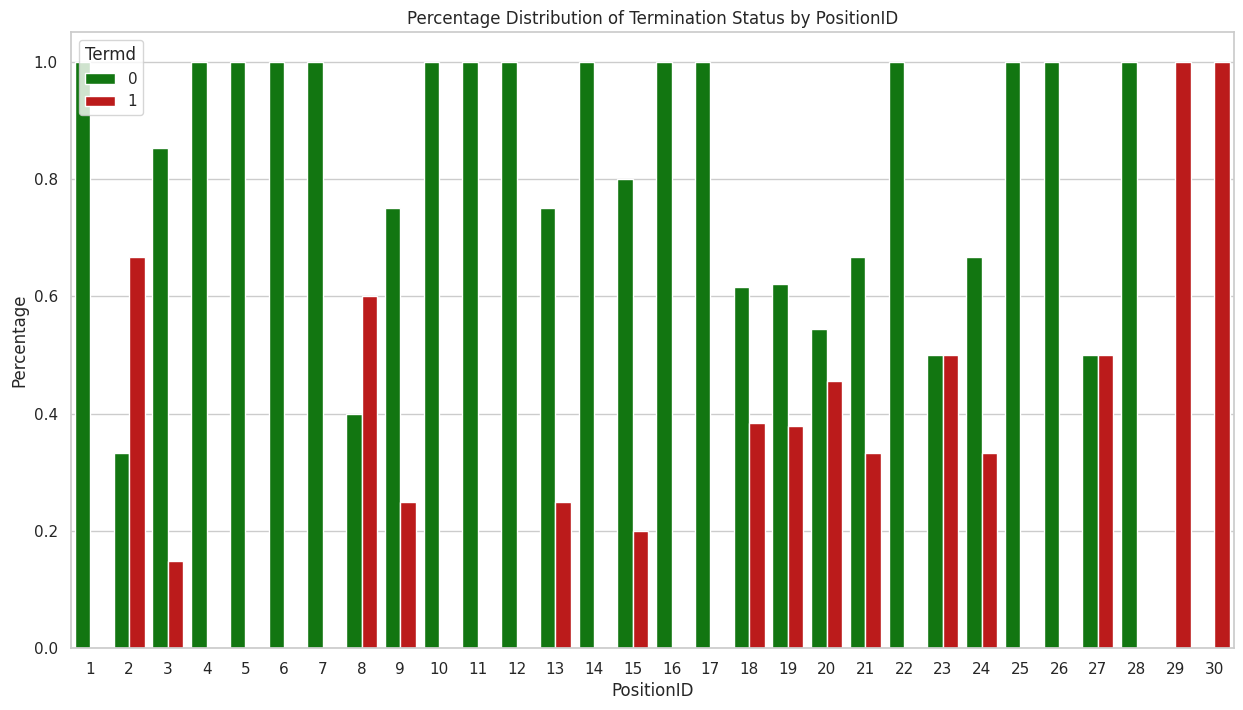

In [30]:


cmap = cc.glasbey_dark

colors = [cmap[i] for i in [2, 0]]

df_pct = df.groupby(['PositionID', 'Termd']).size().groupby(level=0).apply(lambda x: x / x.sum()).reset_index(name='Percent')

sns.set(style='whitegrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='PositionID', y='Percent', hue='Termd', data=df_pct, palette=colors)
plt.title('Percentage Distribution of Termination Status by PositionID')
plt.xlabel('PositionID')
plt.ylabel('Percentage')
plt.show()

The percentage distribution of termination status by PositionID shows that for some positions, the percentage of employees who were terminated (Termd=1) is higher compared to others. This suggests that there may be certain positions that have higher turnover rates or face more challenges in retaining employees. Further analysis and investigation may be needed to identify the reasons behind this pattern and to develop strategies to improve employee retention in these positions.

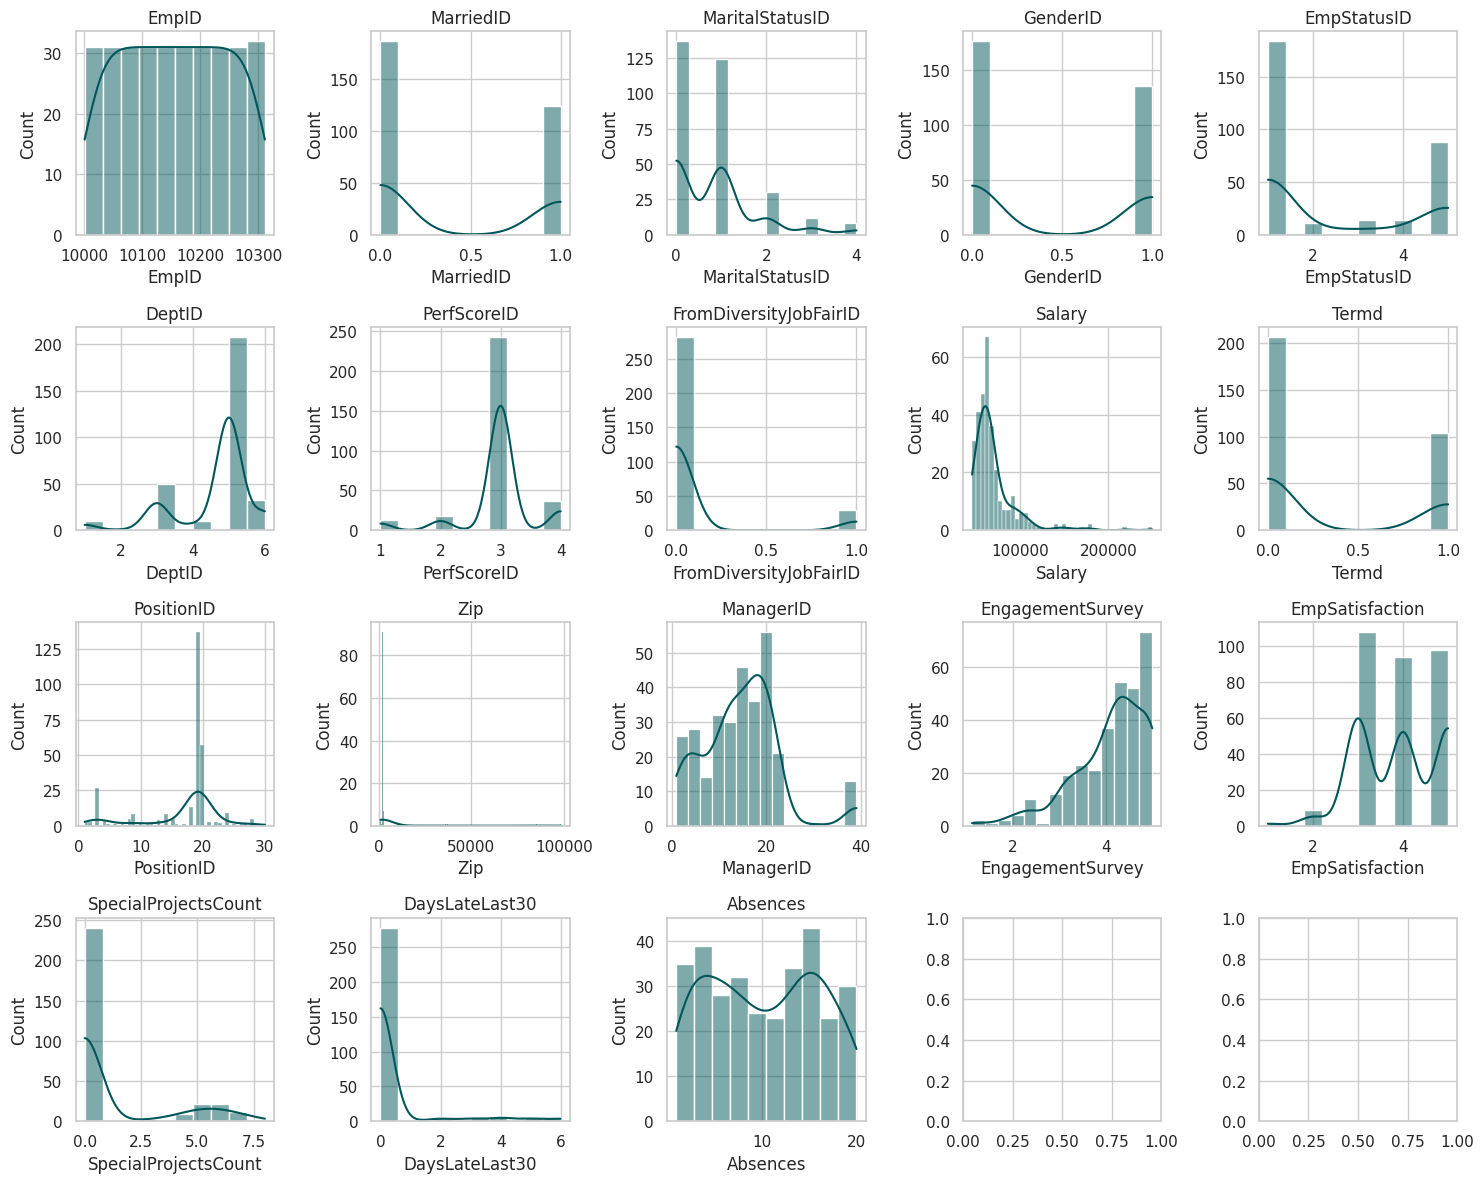

In [39]:
cmap = cc.glasbey_dark
color_blind_green = cmap[8]  

fig, axs = plt.subplots(4, 5, figsize=(15, 12))
for i, num_col in enumerate(num_cols):
    row = i // 5 
    col = i % 5 
    sns.histplot(df[num_col], kde=True, ax=axs[row, col], color=color_blind_green)
    axs[row, col].set_title(num_col)

plt.tight_layout()
plt.show()

The distribution of some variables is not symmetrical, and there are more values on one side of the distribution than the other(skewed). This can have a negative effect on models that assume a normal distribution.
By applying a logarithmic transformation to the data, we can reduce the impact of extreme values and bring the data closer to a normal distribution. This can improve the accuracy and performance of models that are sensitive to skewed data.